# __Genetic Algorithms__

### __One Point CrossOver__
### __Two Point CrossOver__
### __Uniform Point CrossOver__
### __Perfect CrossOver__

In [166]:
import random 
import numpy as np
import matplotlib.pyplot as plt
TOTAL_POP = 100

In [68]:
MSG = "PYTHON"
TARGET = ' '.join(format(ord(m), 'b') for m in MSG)

In [69]:
GENES = '01 '
def chromosome():
    global TARGET
    return [mutation() for t in range(len(TARGET))]
def mutation():
    global GENES
    return random.choice(GENES)

In [70]:
def DNA_mismatch(population):
    global TARGET
    fitness = []
    for p in population:
        fit = 0
        for i in range(len(TARGET)):
            if p[i] != TARGET[i]:
                fit += 1
        fitness.append(fit)
    return list(zip(population,fitness))

In [174]:
def CrossOverWithMutation(p1,p2):
    child_chromosome = []
    for i in range(len(TARGET)):
        prob = random.random()
        if prob <0.45:
            child_chromosome.append(p1[i])
        elif prob <0.90:
            child_chromosome.append(p2[i])
        else:
            child_chromosome.append(mutation())
    return child_chromosome

In [78]:
def CrossOverWithoutMutation(p1,p2):
    child_chromosome = []
    for i in range(len(TARGET)):
        prob = random.random()
        if prob <0.5:
            child_chromosome.append(p1[i])
        else :
            child_chromosome.append(p2[i])
    return child_chromosome

In [111]:
def onePointCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    shuffle_index = np.random.choice(np.arange(0,len(TARGET)))
    for s in range(shuffle_index):
        child_chromosome_1[s],child_chromosome_2[s] = child_chromosome_2[s],child_chromosome_1[s]
    return [child_chromosome_1,child_chromosome_2]

In [124]:
def twoPointCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    shuffle_index = random.choice(np.arange(0,len(TARGET)))
    shuffle_after_index = random.randint(shuffle_index,len(TARGET))
    for s in range(shuffle_index,shuffle_after_index):
        child_chromosome_1[s],child_chromosome_2[s] = child_chromosome_2[s],child_chromosome_1[s]
    return [child_chromosome_1,child_chromosome_2]

In [127]:
def uniformCrossOver(p1,p2):
    global TARGET
    child_chromosome_1,child_chromosome_2= p1,p2
    for index in range(len(TARGET)):
        p = random.random()
        if p < 0.8:
            child_chromosome_1[index],child_chromosome_2[index] = child_chromosome_2[index],child_chromosome_1[index]
        else:
            child_chromosome_1[index],child_chromosome_2[index] = mutation(),mutation()
    return [child_chromosome_1,child_chromosome_2]

In [175]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
error_rate = []
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found or generation == 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = CrossOverWithMutation(population[p1][0],population[p2][0])
            new_generation.append(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 0 10010   110010 100000 0 010101  00   1111011  : Error 25 in Generation :  1
Children :> 00  100 1011011 10 0000 1 1  0  10 01    00  00 : Error 20 in Generation :  2
Children :> 1 11000 1011001 100 100 100100 11  0 00 01010   : Error 17 in Generation :  3
Children :> 1 11000 1011001 100 100 100100 11  0 00 01010   : Error 17 in Generation :  4
Children :>  010 01110100000 010110 101100  100111 11001 00 : Error 15 in Generation :  5
Children :>    0 01  011001  010110 101100  1001111 1001 00 : Error 12 in Generation :  6
Children :> 1111000 10 10 0 101000000001000 1001110 100 010 : Error 11 in Generation :  7
Children :> 11 0100 1011000 101000001001000 1001110 100 11  : Error  9 in Generation :  8
Children :> 1010001 0011000 1000100 1000100 1001110 1 01110 : Error  8 in Generation :  9
Children :> 1010001 10 1000 1000100 1001000 1001110 100 11  : Error  7 in Generation : 10
Children :> 0010000 10110 1 101010010001000 100111  1001110 : Error  5 in Generation : 11
Children :

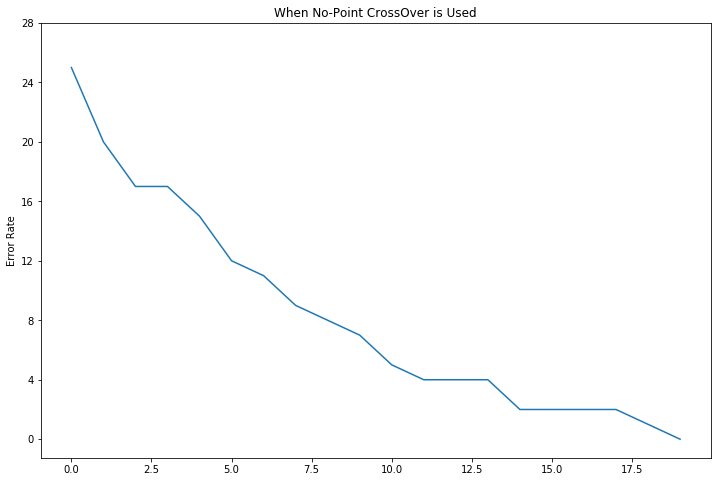

In [176]:
generation = [x for x in range(len(error_rate))]
plt.figure(figsize=(12,8))
plt.title("When No-Point CrossOver is Used")
plt.ylabel("Error Rate")
plt.plot(generation,error_rate)
plt.yticks(np.arange(0,30,4))
plt.show()

In [177]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])
error_rate = []
generation = 1
Found = False
    
while not Found and generation <=200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = CrossOverWithoutMutation(population[p1][0],population[p2][0])
            new_generation.append(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :> 1  000010 11 0   000 001 0110  01  01 1010 110  : Error 24 in Generation :  1
Children :> 101 0  110000 10100000011 11 11  00 111 0 01 00 : Error 22 in Generation :  2
Children :> 10000 01 111010 10 0  0 100100 1 0 1  1 1001 1  : Error 18 in Generation :  3
Children :> 10 1 01 101 001 10  1001100 00 110 1 11  0010 0 : Error 16 in Generation :  4
Children :> 1010100010 10 10101 100  011000 101010 10001110 : Error 14 in Generation :  5
Children :> 101 00001011 01  010000 1001100 000111  100111  : Error  9 in Generation :  6
Children :> 101 000 101100   010000 1000100 1001111 1001110 : Error  6 in Generation :  7
Children :> 1010000 1011001  010000 1001100 1001111 1001100 : Error  4 in Generation :  8
Children :> 101 00  1011001 1110100 1001000 1001111 1001110 : Error  3 in Generation :  9
Children :> 101 000 1011001 101010011001000 1001111 1001110 : Error  2 in Generation : 10
Children :> 1010000 1001001 1010100 1001000 1001111 1001110 : Error  1 in Generation : 11
Children :

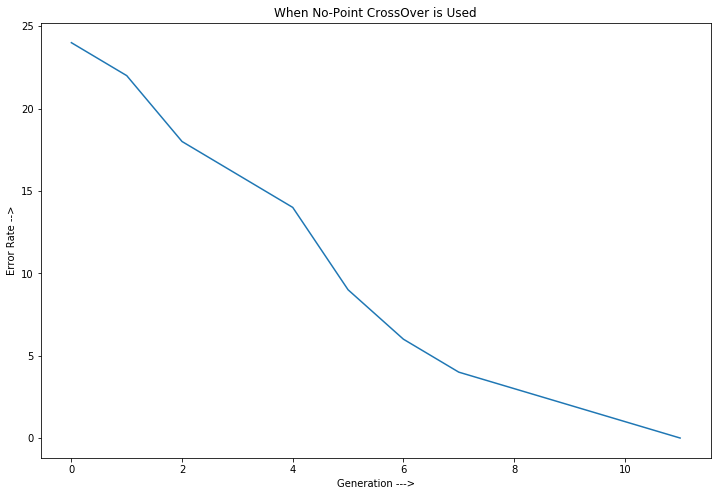

In [178]:
generation = [x for x in range(len(error_rate))]
plt.figure(figsize=(12,8))
plt.title("When No-Point CrossOver is Used")
plt.ylabel("Error Rate -->")
plt.xlabel("Generation --->")
plt.plot(generation,error_rate)
plt.show()

In [157]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
error_rate = []   
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])

generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = onePointCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :>  11 1101 011 00 10  0 001001010 101011101101101 : Error 21 in Generation :  1
Children :> 10 0  11 010  1 100 10 01001010 101011101101101 : Error 20 in Generation :  2
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  3
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  4
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  5
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  6
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  7
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  8
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation :  9
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation : 10
Children :> 10100 11101000 1100 100 1  1 00010101 101101111 : Error 18 in Generation : 11
Children :

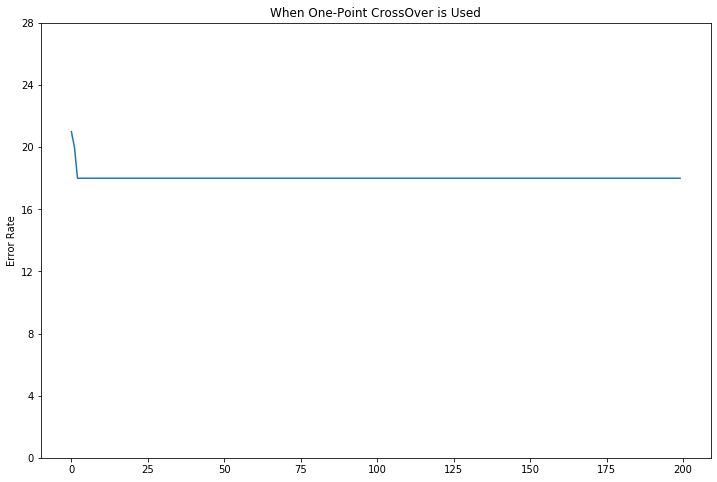

In [158]:
generation = [x for x in range(200)]
plt.figure(figsize=(12,8))
plt.title("When One-Point CrossOver is Used")
plt.ylabel("Error Rate")
plt.plot(generation,error_rate)
plt.yticks(np.arange(0,30,4))
plt.show()

In [156]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])
error_rate = []
generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = twoPointCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1

Children :>  0000 0 111000100 1010 00101111 10010011 0 101  : Error 22 in Generation :  1
Children :>   000 0 1110000 0 0010 01101111 10010111 01 0 0 : Error 23 in Generation :  2
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  3
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  4
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  5
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  6
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  7
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  8
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation :  9
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation : 10
Children :>  11010001 1101  0010000 1   0 1 10 11   10 0 10 : Error 20 in Generation : 11
Children :

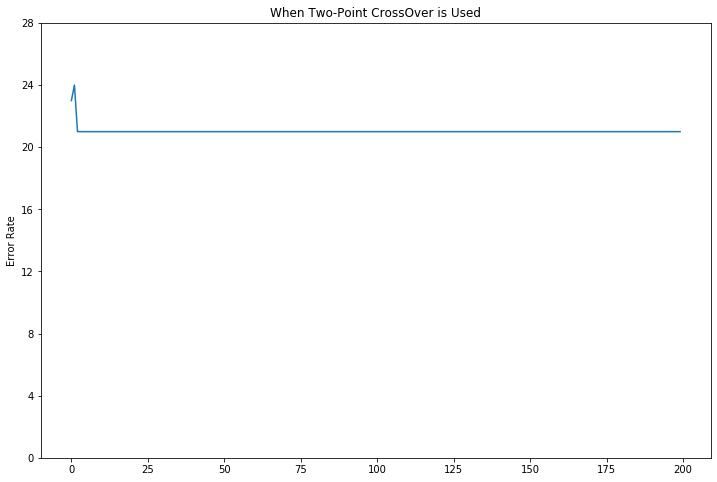

In [155]:
generation = [x for x in range(200)]
plt.figure(figsize=(12,8))
plt.title("When Two-Point CrossOver is Used")
plt.ylabel("Error Rate")
plt.plot(generation,error_rate)
plt.yticks(np.arange(0,30,4))
plt.show()

In [129]:
population = []
for t in range(TOTAL_POP):
    individual = chromosome()
    population.append(individual)
    
population = DNA_mismatch(population)
population = sorted(population,key=lambda x:x[1])
error_rate = []
generation = 1
Found = False
    
while not Found and generation <= 200:
    print("Children :> {} : Error {:2} in Generation : {:2}".format("".join(population[0][0]),population[0][1],generation))
    error_rate.append(population[0][1])
    test = population
    if population[0][1] <= 0:
        Found = True
    ellitism = int(0.1*TOTAL_POP)
    new_generation = [population[i][0] for i in range(ellitism)]
    offsprings = int((0.9*TOTAL_POP))
    for _ in range(offsprings):
        p1,p2 = random.randint(0,50),random.randint(0,50)
        for i in range(2):
            child = uniformCrossOver(population[p1][0],population[p2][0])
            new_generation.extend(child)
    population = new_generation
    population = DNA_mismatch(population)
    population = sorted(population,key=lambda x:x[1])
    generation +=1   

Children :> 00  11  10010 1111 010001  1 0101000 011101110  : Error 24 in Generation :  1
Children :> 0 1011110001 01 1011111 10    01100110001 010 1 : Error 24 in Generation :  2
Children :>  110000 100 11011 1111      001 11001 101010101 : Error 25 in Generation :  3
Children :>  111 0011110010 1 1 00  1111   0101111 101 1111 : Error 26 in Generation :  4
Children :>  111  011 101 1100000   10 00   1 0 011 0100101 : Error 28 in Generation :  5
Children :> 0 0110000  001 11110 1 0 010  11 00    10 10100 : Error 36 in Generation :  6
Children :>     1 0110 101 101 1  00  0  100 010  1110  010 : Error 33 in Generation :  7
Children :> 110 0   0  1001111 10110110 1 01 00  1  11 0100 : Error 29 in Generation :  8
Children :>   00 11 01 1   000 0 010010   1 01 1 11 11 011  : Error 32 in Generation :  9
Children :>  00 0100011 0100 011110101011 1 10 0 1101  01 1 : Error 29 in Generation : 10
Children :>  1  1 011101101 0 000 11 11  0001   11 0   10   : Error 34 in Generation : 11
Children :

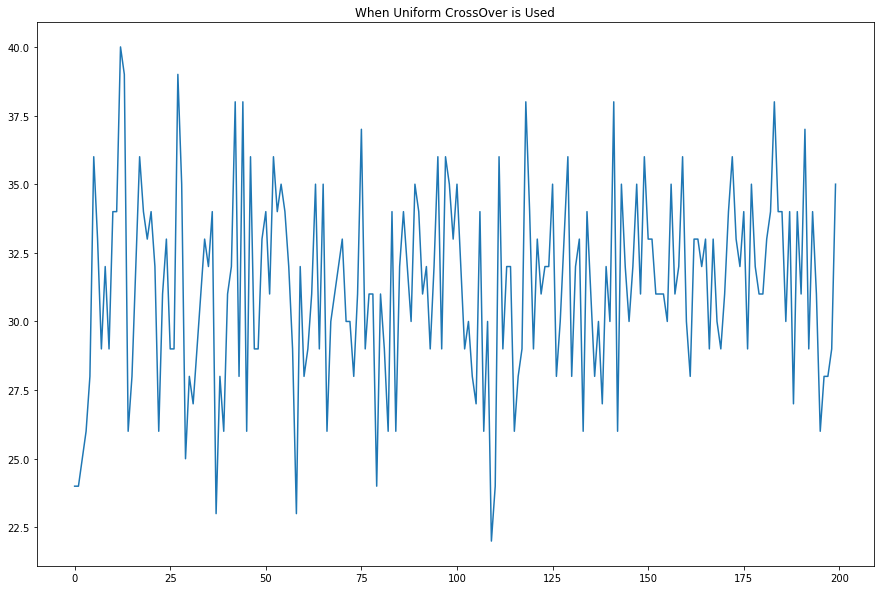

In [144]:
generation = [x for x in range(200)]
plt.figure(figsize=(15,10))
plt.title("When Uniform CrossOver is Used")
plt.plot(generation,error_rate)